Exercise Sheet 1 Machine Learning for Physicists - Ludwig Neste
===

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [2]:
from IPython.display import Markdown as md

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## 1. A primer in statistics

In this exercise we need to use Bayes Law: 
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{\sum_i P(B|i)P(i)}
$$

In [3]:
# Define the variables from the exersise (hopefully the names are clear)
s_s, s_e, s_i = 0.95, 0.9, 0.8 # sensetifity
p_s, p_e, p_i = 0.7, 0.28, 0.02 # probability

### a)
Using Bayes Law, the probability that a galaxy is irregular, under the condition that it is classified as irregular is 
$$
P(I|CI) = \frac{P(CI|I) P(I)}{P(CI|I)P(I)+P(CI|E)P(E)+P(CI|S)P(S)}
$$

In [4]:
p_i_ci = s_i*p_i/(p_i*s_i+p_e*(1-s_e)/2+p_s*(1-s_s)/2)
md(f"Solution: $P(I|CI)={p_i_ci*100:.2f}\%$")

Solution: $P(I|CI)=33.68\%$

### b)
Using Bayes Law, the probability that a galaxy is irregular, under the condition that it is classified as irregular is 
$$
P(S|CE) = \frac{P(CE|S) P(S)}{P(CE|I)P(I)+P(CE|E)P(E)+P(CE|S)P(S)}
$$

In [5]:
p_s_ce = (1-s_e)/2*p_s/(p_i*(1-s_i)/2+p_e*s_e+p_s*(1-s_s)/2)
md(f"Solution: $P(I|CI)={p_s_ce*100:.2f}\%$")

Solution: $P(I|CI)=12.89\%$

## 2. Linear regression

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [7]:
# This is the given data
x = np.array([3, 4, 6, 8, 12, 15])
y = np.array([14, 20, 27, 41, 63, 73])

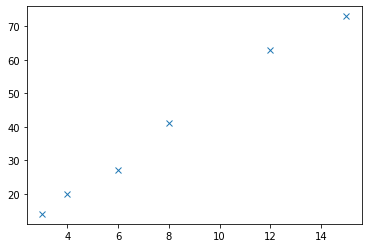

In [8]:
plt.plot(x, y, "x")

Derive the optimal parameters for linear regression minimizing the square error on the "training-set" (in ML speak).
Our hypothesis class is the function space:
$$
\mathcal{H} = \{f\mapsto ax+b\ |\ a, b \in \mathbb{R}\}
$$
The square error is the loss function: 
$$
L(\vec x, \vec y) = \sum_{i=0}^{N} \left(y_i-f(x_i)\right)^2=\left(\vec y - \vec f (x) \right)^2 = \left(\vec y - \vec f (x) \right)^{\mathrm{T}}\left(\vec y - \vec f (x) \right)
$$
Where 
$\vec x$ is the column vector of $x$-data, $\vec y$ is the column vector of $y$-data and 
$$
\vec f(\vec x) = 
\begin{pmatrix}
f(x_1)\\
f(x_2)\\
\dots \\
f(x_N)
\end{pmatrix}
=
\begin{pmatrix}
a x_1+b\\
a x_2+b\\
\dots \\
a x_N+b
\end{pmatrix}
=
a\vec x +b \vec 1
=\overbrace{(\vec x, \vec 1)}^{\underline M}
\begin{pmatrix}
a \\
b
\end{pmatrix}
= \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix}
$$
where $\vec 1$ is the $N$-row column vector with only ones in it. 

So minimizing the loss function in the hypothesis space means minimizing the loss function with respect to a, b:
$$
\nabla_{a,b} L = \nabla_{a,b} \left(\vec y - \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix} \right)^{\mathrm{T}}\left(\vec y - \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix} \right)
=M^{\mathrm{T}}\left(\vec y - \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix} \right)+\left(\vec y - \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix} \right)^{\mathrm{T}}\underline M 
= 2M^{\mathrm{T}}\left(\vec y - \underline M 
\begin{pmatrix}
a \\
b
\end{pmatrix} \right)
\overset{!}{=}0
$$

$$
\Leftrightarrow M^{\mathrm{T}}\vec y = M^{\mathrm{T}} M \begin{pmatrix}
a \\
b
\end{pmatrix}
\Leftrightarrow \begin{pmatrix}
a \\
b
\end{pmatrix} 
=
(M^{\mathrm{T}} M)^{-1} M^{\mathrm{T}}\vec y
$$
The last step being possible, since $M^{\mathrm{T}}M$ is a square matrix.

In [9]:
# Get the the parameters a, b for linear regression
def get_lingress_params(x, y):
    M = np.array([x, np.ones(x.shape[0])]).T
    return inv(M.T@M)@M.T@y

### a)

In [10]:
a = get_lingress_params(x, y)
md(f"$a={a[0]:.2f}$\n\n$b={a[1]:.2f}$")

$a=5.08$

$b=-0.99$

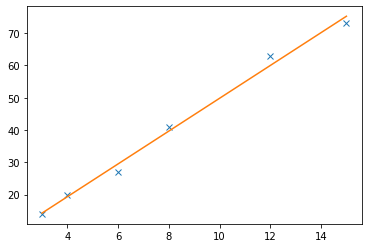

In [11]:
x_fit = np.linspace(np.min(x), np.max(x), 500)
plt.plot(x, y, "x")
plt.plot(x_fit, a[0]*x_fit+a[1])

### b)
'Trick' here: the roles of y and x are switched around, so just reuse the function:

In [12]:
a2 = get_lingress_params(y, x)
md(f"$c={a2[0]:.2f}$\n\n$d={a2[1]:.2f}$")

$c=0.20$

$d=0.26$

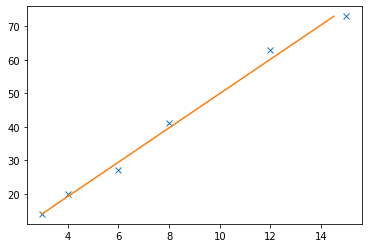

In [13]:
y_fit = np.linspace(np.min(y), np.max(y), 500)
plt.plot(x, y, "x")
plt.plot(a2[0]*y_fit+a2[1], y_fit)

### c)

In [14]:
f1 = a[0]*5+a[1]
f2 = (5-a2[1])/a2[0]
md(f"$f_1(5)={f1:.2f}$ and $f_2^{{-1}}(5)={f2:.2f}$")

$f_1(5)=24.42$ and $f_2^{-1}(5)=24.30$

### d)
Observe that $a\neq 1/c$ and $b\neq-d/c$!
Since we have two different models, so to speak: 'The parameters to minimize the square error on the model, does not minimize the errors on the 'inverse' model'!

So the main difference is: $L(f_1(x), y) \neq L(x, f_2(y))$, so we optimize the params for different things.

When to prefer one model over the other is hard to say. If you know $x$ is given and $y$ is calculated, you should prefer $f_1$ (e.g. the setting of the heater is a number and the room temp depends on it). If you know that $y$ is given and depends on $x$, you should use $f_2$. This is so to speak prior knowledge about the model.

## 3. Linear regression

The likelihood of observing $y_i$ under the data $X$ with the given model is:
$$
P(\vec y | X) = L(\vec w) = \prod_{i=1}^{N}\frac{1}{2b} e^{-\frac{\left| \epsilon_i\right|}{b}}
=
\frac{1}{2^Nb^N}\exp\left(-\frac{1}{b}\sum_{i=1}^{N}\left|\epsilon_i\right|\right)
=
\frac{1}{2^Nb^N}\exp\left(-\frac{1}{b}\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
$$

### a) 
This means that with MLE, we have:
$$
\vec w_{\mathrm{opt}} = 
\underset{\vec w}{\mathrm{argmax}}
\frac{1}{2^Nb^N}\exp\left(-\frac{1}{b}\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
= 
\underset{\vec w}{\mathrm{argmax}}
\exp\left(-\frac{1}{b}\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
= 
\underset{\vec w}{\mathrm{argmax}}
\left(-\frac{1}{b}\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
= 
\underset{\vec w}{\mathrm{argmin}}
\left(\frac{1}{b}\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
= 
\underset{\vec w}{\mathrm{argmin}}
\left(\sum_{i=1}^{N}\left|y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|\right)
$$

Where we have used that searching the argument $\vec w$ that maximizes/minimizes a function $a\cdot f(\vec w)$ is the same as searching with the function $f(\vec w)$.

If we have a stricly monotone function $g: \mathbb{R} \rightarrow \mathbb{R}$, we also have used the relations
$\underset{\vec w}{\mathrm{argmax}}\ f(\vec w)=\underset{\vec w}{\mathrm{argmax}}\ g(f(\vec w))$, 
and 
$\underset{\vec w}{\mathrm{argmax}}\ f(\vec w)=\underset{\vec w}{\mathrm{argmin}}\ -f(\vec w)$.
We used $g=\ln$ in step 2.

### b)
From our Argumentation in a) we find:
$$
J_2(\vec w)=\sum_{i=1}^{N}\left| y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|
$$
though we could equaly choose
$$
J_2(\vec w)=\frac{1}{N}\sum_{i=1}^{N}\left| y_i-{\vec w}^{\mathrm{T}}\cdot\vec x_i\right|
$$

### c)
Since this loss function does not have squared errors, it can be efficient to have for example one point far away from the model, if for that another point is very close to the model. 
If we have squared errors, this would be unfavorible, because the big error is multiplied by itself.

## 4. Confusion Matrix
|| Classified as True | Classified as False | Sum |
|:------| :-----------: | :-----------: |------:|
| **True** | 300      | 200       |500|
| **False** | 100   | 400       |500|
| **Sum** | 400   |  600        |1000|

## 5. Exercises from *Understanding Machine Learning*